<a href="https://colab.research.google.com/github/AlbinB/Text-Analytics-NLP/blob/main/1_3_1_%2BMulti_Lingual%2BClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture Notes

<h2>Evaluating Classifiers</h2>

**We measure how well a classifier works by comparing predicted labels against actual labels.**

Text classification is when humans create a system of labels and then train artificial intelligence to reproduce these labels on a large-scale. One goal is to automate document labelling: we might know how to label a newspaper article (about corruption, about sports, etc.). But we can’t read all the articles in the world. So a text classifier can be used to automate a simple task like this. A different use is to tell us about something we didn’t already know: why are some hotel experiences good and others bad? What are the factors that differentiate these two classes?

* **Training-Testing.** The most important idea is that we need to keep training data separate from testing data. If we use a text classifier to determine which newspaper articles are talking about corruption, we can only evaluate that classifier on new articles that it hasn’t seen before.

* **Cross-Validation.** Sometimes our classifiers require hand-annotated training data, where a human labels each document. This is time-consuming. As a result, hand-annotated datasets tend to be fairly small. Cross-validation allows us to get the most out of these datasets by training and testing on random divisions of the data. This gives us an estimate of how robust the classifier is without requiring extra human effort.

* ** Precision and Recall.** Let’s say we have a binary classification problem: a hotel review is either good or bad. For each sample, the classifier makes a prediction (good or bad) and we know the actual category (good or bad). This gives us two kinds of errors: false positives (the classifier identified a bad review as being good) or false negatives (the classifier identified a good review as being bad). Precision is a reflection of our true positive rate and recall is a reflection of how many true positives we’ve missed

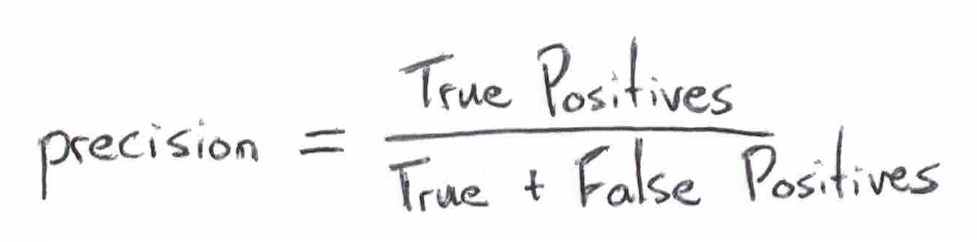

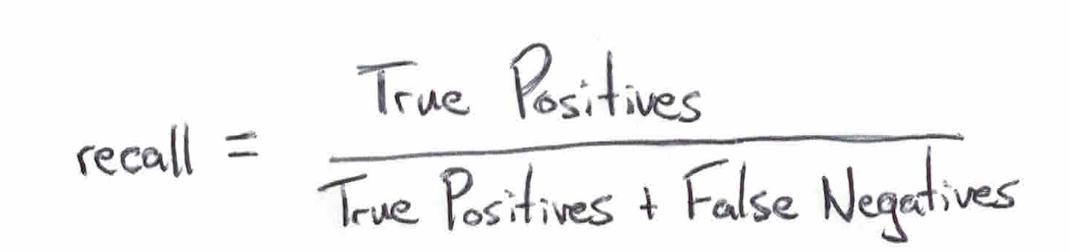

* **F-Score.** For simplicity, we might want a single measure of performance, like accuracy. But accuracy can be misleading in imbalanced datasets. For example, if 90% of newspaper articles have nothing to do with corruption, we can achieve 90% accuracy by always predicting negative. The F-Score removes this potential bias by combining precision and recall. It gives us a simple measure of overall classification performance.

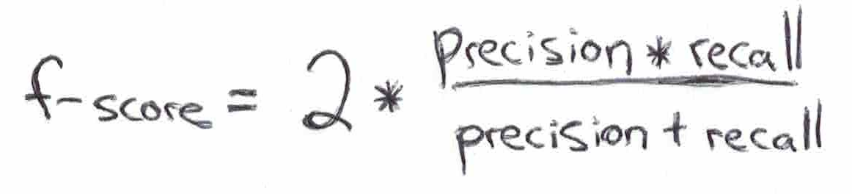

# Colab Setup

In [1]:
# if you are running these labs in CoLab, you will first need to mount the drive and 
# copy text_analitics.py to path 

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
###Add text_analytics.py to path 
!cp "/content/drive/My Drive/Colab Notebooks/CourseWork/Text Analytics and Natural Language Processing/text_analytics.py" .
print("Done!")

Done!


# Lecture Lab

Welcome to our first lab for Module 3!

Today we are going to look at text classification across 42 languages. Now that we've learned about *precision* and *recall* and *f-score*, we can use these metrics to look at how well our methods work for languages that aren't English!

In [3]:
from text_analytics import text_analytics
import os
import pandas as pd

ai = text_analytics()
print("Done!")

Done!


The task that we'll be looking at is simple but important: identifying the register or source that data comes from. So, we'll be learning how to determine whether a sample comes from Wikipedia, Twitter, or OpenSubtitles. This can be important in a pipeline; for example, we might want to have a different model for each type of data. 

Regardless, for our purposes this is going to let us compare results across all these languages. Let's load a csv file that contains the classification results.

In [5]:
file = "register.csv"
file = os.path.join(ai.data_dir, file)
df = pd.read_csv(file)
print(df)
print("Done!")

    Language      Register  Precision  Recall  F-Score  N.Samples
0        ara      OpenSubs       0.98    0.99     0.99      20037
1        ara       Twitter       0.97    0.96     0.96      19922
2        ara     Wikipedia       0.96    0.97     0.97      20042
3        ara  Weighted_AVG       0.97    0.97     0.97      60001
4        bul      OpenSubs       0.95    0.96     0.95      19909
..       ...           ...        ...     ...      ...        ...
163      vie  Weighted_AVG       0.97    0.97     0.97      60001
164      zho      OpenSubs       0.96    0.85     0.90      20163
165      zho       Twitter       0.96    0.65     0.78      19801
166      zho     Wikipedia       0.69    0.99     0.81      20037
167      zho  Weighted_AVG       0.87    0.83     0.83      60001

[168 rows x 6 columns]
Done!


This is a lot of information, too much to look at. So, let's narrow this down to the *f-score*. Since this is the harmonic mean of precision and recall, it makes sense to focus on just this one metric.

In [7]:
df = df.loc[:,["Language", "Register", "F-Score"]]
print(df)
print("Done!")

    Language      Register  F-Score
0        ara      OpenSubs     0.99
1        ara       Twitter     0.96
2        ara     Wikipedia     0.97
3        ara  Weighted_AVG     0.97
4        bul      OpenSubs     0.95
..       ...           ...      ...
163      vie  Weighted_AVG     0.97
164      zho      OpenSubs     0.90
165      zho       Twitter     0.78
166      zho     Wikipedia     0.81
167      zho  Weighted_AVG     0.83

[168 rows x 3 columns]
Done!


Now, this is still a bunch of information. The *Weighted_AVG* gives us an overview of how well the classifier works across all the registers. So let's just look at it.

In [8]:
df = df.loc[df["Register"] == "Weighted_AVG"]
print(df)
print("Done!")

    Language      Register  F-Score
3        ara  Weighted_AVG     0.97
7        bul  Weighted_AVG     0.94
11       cat  Weighted_AVG     0.97
15       ces  Weighted_AVG     0.94
19       dan  Weighted_AVG     0.94
23       deu  Weighted_AVG     0.93
27       ell  Weighted_AVG     0.93
31       eng  Weighted_AVG     0.95
35       est  Weighted_AVG     0.95
39       fas  Weighted_AVG     0.97
43       fin  Weighted_AVG     0.93
47       fra  Weighted_AVG     0.97
51       hin  Weighted_AVG     0.96
55       hun  Weighted_AVG     0.91
59       ind  Weighted_AVG     0.97
63       isl  Weighted_AVG     0.98
67       ita  Weighted_AVG     0.93
71       jpn  Weighted_AVG     0.77
75       kat  Weighted_AVG     0.96
79       kaz  Weighted_AVG     0.96
83       kor  Weighted_AVG     0.98
87       lav  Weighted_AVG     0.94
91       lit  Weighted_AVG     0.95
95       mkd  Weighted_AVG     0.95
99       nld  Weighted_AVG     0.94
103      nor  Weighted_AVG     0.95
107      pol  Weighted_AVG  

And we can make the "Language" column the index now, as well. Because we have only one row per language.

In [9]:
df = df.set_index("Language", drop = True)
df = df.drop(columns = ["Register"])
print(df)
print("Done!")

          F-Score
Language         
ara          0.97
bul          0.94
cat          0.97
ces          0.94
dan          0.94
deu          0.93
ell          0.93
eng          0.95
est          0.95
fas          0.97
fin          0.93
fra          0.97
hin          0.96
hun          0.91
ind          0.97
isl          0.98
ita          0.93
jpn          0.77
kat          0.96
kaz          0.96
kor          0.98
lav          0.94
lit          0.95
mkd          0.95
nld          0.94
nor          0.95
pol          0.94
por          0.96
ron          0.96
rus          0.92
slk          0.97
slv          0.95
spa          0.93
sqi          0.96
swe          0.95
tam          0.97
tgl          0.99
tur          0.95
ukr          0.95
urd          0.97
vie          0.97
zho          0.83
Done!


Now, let's make a chart!

Done!


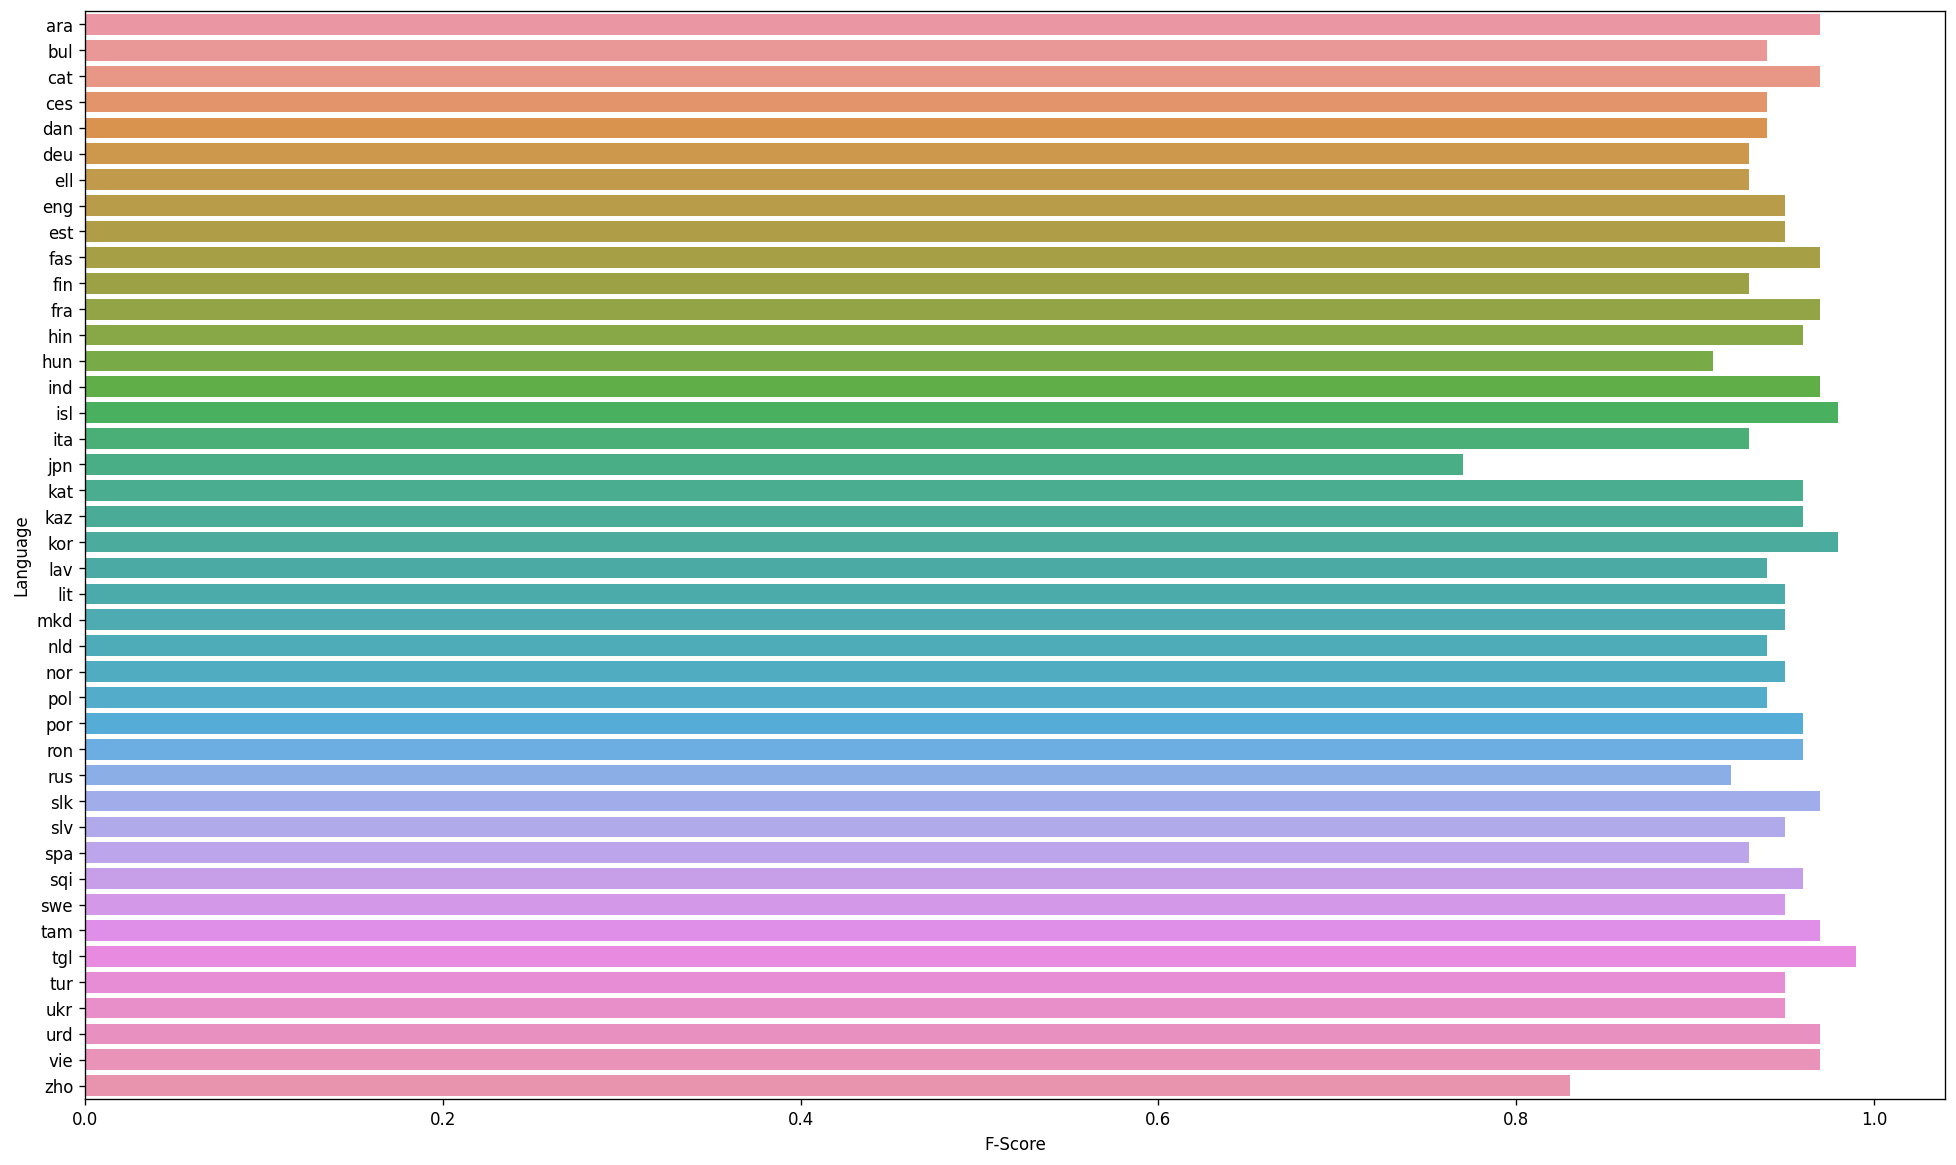

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20,12]
plt.rcParams['figure.dpi'] = 120

ax = sns.barplot(y = df.index, x = "F-Score", data = df)
print("Done!")

So the same basic methods work for a lot of languages. But some languages, like Japanese and Chinese, are going to require special processing. Because their writing systems are so different.

You'll notice that "Language" here is a three-letter code. We're using the ISO-639(2) codes. That's because languages refer to themselves and to each other using a bunch of different terms. So, we need to use an international standard to be consistent. For reference, the codes we've just used are listed below with their informal English counterpart.

| Code       | Language     | Code     | Language     |
| :--------- | :----------: | -------: | -----------: |
|  ara       | Arabic       | lav      | Latvian      |
|  bul       | Bulgarian    | lit      | Lithuanian   | 
|  cat       | Catalan      | mkd      | Macedonian   | 
|  ces       | Czech        | nld      | Dutch        | 
|  dan       | Danish       | nor      | Norwegian    | 
|  deu       | German       | pol      | Polish       | 
|  ell       | Greek        | por      | Portuguese   | 
|  eng       | English      | ron      | Romanian     | 
|  est       | Estonian     | rus      | Russian      | 
|  fas       | Farsi        | slk      | Slovak       | 
|  fin       | Finnish      | slv      | Slovenian    | 
|  fra       | French       | spa      | Spanish      | 
|  hin       | Hindi        | sqi      | Albanian     | 
|  hun       | Hungarian    | swe      | Swedish      | 
|  ind       | Indonesian   | tam      | Tamil        | 
|  isl       | Icelandic    | tgl      | Tagalog      | 
|  ita       | Italian      | tur      | Turkish      | 
|  jpn       | Japanese     | ukr      | Ukrainian    | 
|  kat       | Georgian     | urd      | Urdu         | 
|  kaz       | Kazakh       | vie      | Vietnamese   | 
|  kor       | Korean       | zho      | Chinese      | 

Let's take a look at what these languages look like. We'll use "ara" for Arabic. But you can try other languages by replacing that with the correct code.

In [11]:
file = "Register.ara.gz"
file = os.path.join(ai.data_dir, file)
df = pd.read_csv(file, index_col = 0)
print(df)
print("Done!")

         Register                                               Text
0       Wikipedia  تصنيففلاسفة القرن تصنيفاقتصاديات الأعمال بطرير...
1       Wikipedia  انخفاض درجة الحرارة فسفور آمنة السيد حيدر الصد...
2       Wikipedia  السابق صدام حسين في عام م مع شقيقها تصنيفموالي...
3       Wikipedia  تأسست سنة كان عدد العمال الأمريكيين لكل متقاعد...
4       Wikipedia  عدد المستفيدين من برنامج الضمان الاجتماعي من م...
...           ...                                                ...
599998    Twitter  يا يمانيه مادام حنا يالسعوديين وصخين ارجعوا دي...
599999    Twitter  القصد كل المهن يحتاجها الانسان وجعل رواتبها مت...
600000    Twitter  نفس المكان الذي اعلنت فيه داعش القذره خرافتها ...
600001    Twitter  لم ينصفه الاعلام كان رجل الظل لكنه رجل الميدان...
600002    Twitter  الشعب العراقي النصر الكبير على الدواعش في المو...

[600003 rows x 2 columns]
Done!


So, today we've looked a bit further at classification results. We've seen that most (but not all) have similar results on the same task. And we've had a chance to look at some non-English data.

# Practice